In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('FuelConsumption (1).csv')

In [3]:
print("Sample data:")
print(df.head())

Sample data:
   Year   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  COEMISSIONS   
0    X              10.5           216  
1    X               9.8           205  
2    Z              13.7           265  
3    Z              15.0           301  
4    X              11.4           230  


In [4]:
df = df.dropna()

In [5]:
df = pd.get_dummies(df, columns=['FUEL', 'TRANSMISSION', 'VEHICLE CLASS', 'MAKE'], drop_first=True)


In [12]:
X = df.drop(['COEMISSIONS ', 'MODEL'], axis=1)  
y = df['COEMISSIONS ']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred = model.predict(X_test)


In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Random Forest Regressor Results:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score (Accuracy-like): {r2:.4f} ({r2*100:.2f}%)")



✅ Random Forest Regressor Results:
Mean Absolute Error: 5.54
Mean Squared Error: 161.26
R² Score (Accuracy-like): 0.9692 (96.92%)


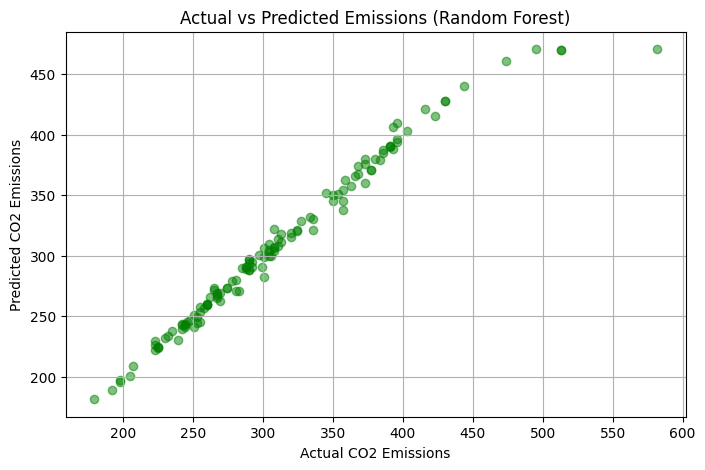

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted Emissions (Random Forest)")
plt.grid(True)
plt.show()